In [2]:
# Initial imports
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Loading data
file_path = Path("scaled_profile.csv")
df = pd.read_csv(file_path)
df.head()

,sex,athletic,curvy,declined to answer,fit,overweight,skinny,declined to answer.1,halal,kosher,...,leo,libra,pisces,sagittarius,scorpio,taurus,virgo,age_scaled,height_scaled,income_scaled
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.093877,1.678397,-1.007603
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.281389,0.426715,-0.707548
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.598758,-0.073958,-0.515550
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.988087,0.677051,-1.181193
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.353349,-0.574631,0.018412


In [4]:
df.isna().sum()

sex                   1
athletic              1
curvy                 1
declined to answer    1
fit                   1
                     ..
taurus                1
virgo                 1
age_scaled            1
height_scaled         1
income_scaled         1
Length: 81, dtype: int64

In [5]:
df1=df.dropna()

In [6]:
df['height_scaled'].astype('float64')

0        1.678397
1        0.426715
2       -0.073958
3        0.677051
4       -0.574631
           ...   
59938   -1.575978
59939    0.927388
59940    0.677051
59941    1.177724
59942   -0.073958
Name: height_scaled, Length: 59943, dtype: float64

In [7]:
df.dtypes

sex                   float64
athletic              float64
curvy                 float64
declined to answer    float64
fit                   float64
                       ...   
taurus                float64
virgo                 float64
age_scaled            float64
height_scaled         float64
income_scaled         float64
Length: 81, dtype: object

In [8]:

for key, value in df.iteritems():
    print(key, value.max())

sex 1.0
athletic 1.0
curvy 1.0
declined to answer 1.0
fit 1.0
overweight 1.0
skinny 1.0
declined to answer.1 1.0
halal 1.0
kosher 1.0
other 1.0
vegan 1.0
vegetarian 1.0
declined to answer.2 1.0
no 1.0
rarely 1.0
yes 1.0
no.1 1.0
rarely.1 1.0
yes.1 1.0
declined to answer.3 1.0
high school 1.0
law school 1.0
masters program 1.0
med school 1.0
middle school 1.0
ph.d program 1.0
black 1.0
declined 1.0
hispanic-latin 1.0
indian 1.0
middle-eastern 1.0
native_american 1.0
other.1 1.0
pacific_islander 1.0
white 1.0
banking / financial / real estate 1.0
clerical / administrative 1.0
computer / hardware / software 1.0
construction / craftsmanship 1.0
declined to answer.4 1.0
education / academia 1.0
entertainment / media 1.0
executive / management 1.0
hospitality / travel 1.0
law / legal services 1.0
medicine / health 1.0
military 1.0
political / government 1.0
retired 1.0
sales / marketing / biz dev 1.0
science / tech / engineering 1.0
student 1.0
transportation 1.0
unemployed 1.0
gay 1.0
strai

In [9]:
for key, value in df.iteritems():
    print(key, value.isna())

sex 0        False
1        False
2        False
3        False
4        False
         ...  
59938    False
59939    False
59940    False
59941    False
59942    False
Name: sex, Length: 59943, dtype: bool
athletic 0        False
1        False
2        False
3        False
4        False
         ...  
59938    False
59939    False
59940    False
59941    False
59942     True
Name: athletic, Length: 59943, dtype: bool
curvy 0        False
1        False
2        False
3        False
4        False
         ...  
59938    False
59939    False
59940    False
59941    False
59942     True
Name: curvy, Length: 59943, dtype: bool
declined to answer 0        False
1        False
2        False
3        False
4        False
         ...  
59938    False
59939    False
59940    False
59941    False
59942     True
Name: declined to answer, Length: 59943, dtype: bool
fit 0        False
1        False
2        False
3        False
4        False
         ...  
59938    False
59939    False
5994

Name: sales / marketing / biz dev, Length: 59943, dtype: bool
science / tech / engineering 0        False
1        False
2        False
3        False
4        False
         ...  
59938    False
59939    False
59940    False
59941    False
59942     True
Name: science / tech / engineering, Length: 59943, dtype: bool
student 0        False
1        False
2        False
3        False
4        False
         ...  
59938    False
59939    False
59940    False
59941    False
59942     True
Name: student, Length: 59943, dtype: bool
transportation 0        False
1        False
2        False
3        False
4        False
         ...  
59938    False
59939    False
59940    False
59941    False
59942     True
Name: transportation, Length: 59943, dtype: bool
unemployed 0        False
1        False
2        False
3        False
4        False
         ...  
59938    False
59939    False
59940    False
59941    False
59942     True
Name: unemployed, Length: 59943, dtype: bool
gay 0        Fal

In [10]:
ds = df.isin([np.inf, -np.inf])
print(ds)

         sex  athletic  curvy  declined to answer    fit  overweight  skinny  \
0      False     False  False               False  False       False   False   
1      False     False  False               False  False       False   False   
2      False     False  False               False  False       False   False   
3      False     False  False               False  False       False   False   
4      False     False  False               False  False       False   False   
...      ...       ...    ...                 ...    ...         ...     ...   
59938  False     False  False               False  False       False   False   
59939  False     False  False               False  False       False   False   
59940  False     False  False               False  False       False   False   
59941  False     False  False               False  False       False   False   
59942  False     False  False               False  False       False   False   

       declined to answer.1  halal  kos

# Using k-means

In [11]:
inertia = []
k = list(range(1, 20))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(df1)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,492702.924481
1,2,446351.018229
2,3,413101.492968
3,4,389417.187562
4,5,378080.556964


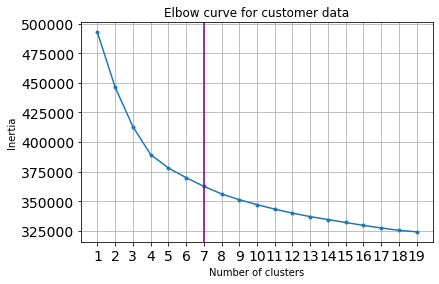

In [12]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'], marker ='.')
plt.xticks(range(1,20))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.grid()
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x = 7, color = 'purple')
plt.savefig('elbow_plot.png')
plt.show()


In [13]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [14]:
clusters = get_clusters(7, df1)

/var/folders/ng/g2rw737s09b_hmsyrmqzpq300000gn/T/ipykernel_89359/2400837161.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["class"] = model.labels_


In [15]:
clusters

,sex,athletic,curvy,declined to answer,fit,overweight,skinny,declined to answer.1,halal,kosher,...,libra,pisces,sagittarius,scorpio,taurus,virgo,age_scaled,height_scaled,income_scaled,class
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.093877,1.678397,-1.007603,6
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.281389,0.426715,-0.707548,3
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.598758,-0.073958,-0.515550,3
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.988087,0.677051,-1.181193,3
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.353349,-0.574631,0.018412,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59937,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.141770,-1.575978,0.198983,4
59938,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.820340,-1.575978,-1.212178,2
59939,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.882298,0.927388,0.389784,5
59940,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.021916,0.677051,-0.807030,3


In [62]:
class_df=clusters['class']
class_df

0        6
1        3
2        3
3        3
4        4
        ..
59937    4
59938    2
59939    5
59940    3
59941    5
Name: class, Length: 59941, dtype: int32

In [63]:
class_df1=pd.DataFrame(class_df)
class_df1

,class
0,6
1,3
2,3
3,3
4,4
...,...
59937,4
59938,2
59939,5
59940,3


In [33]:
clustered_df=pd.DataFrame(clusters)
clustered_df.head()

,sex,athletic,curvy,declined to answer,fit,overweight,skinny,declined to answer.1,halal,kosher,...,libra,pisces,sagittarius,scorpio,taurus,virgo,age_scaled,height_scaled,income_scaled,class
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.093877,1.678397,-1.007603,6
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.281389,0.426715,-0.707548,3
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.598758,-0.073958,-0.515550,3
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.988087,0.677051,-1.181193,3
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.353349,-0.574631,0.018412,4


In [34]:
def show_clusters(df):
    plt.scatter(df['age_scaled'], df['income_scaled'], c=df['class'])
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.show()

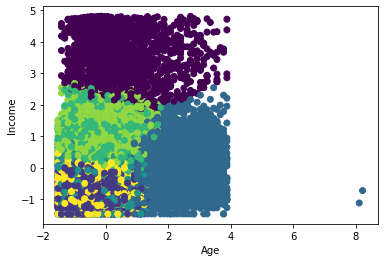

In [35]:
show_clusters(clusters)

We can also check the relative size and distribution of the clusters using an inter-cluster distance map.

In [58]:
# Inter cluster distance map
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(model)
visualizer.fit(clustered_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (/Users/kalaimano/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/metaestimators.py)

In [57]:
#pip install yellowbrick

     |████████████████████████████████| 274 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 8.6 MB 4.6 MB/s eta 0:00:01     |███▋                            | 972 kB 4.1 MB/s eta 0:00:02
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


# Using PCA

In [52]:
from sklearn.decomposition import PCA

# PCA to view potential clusters later
pca = PCA(n_components=0.95)
pca.fit(df1)
pc_df = pca.transform(df1)

In [53]:
# Transform PCA data to a DataFrame
pca_df = pd.DataFrame(data=pc_df)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,-3.134921,-1.091504,-0.574869,-0.638490,-0.038129,-0.667748,0.780931,0.485926,0.219400,-0.058235,...,-0.115637,-0.029284,0.016197,0.086822,-0.051853,-0.021817,0.215746,-0.176583,0.139717,-0.135441
1,0.280089,-0.210376,-0.977932,-0.467347,-0.479160,0.554850,0.197304,0.321864,0.197401,0.118496,...,-0.207061,0.008099,-0.036070,-0.025785,-0.069442,-0.031597,0.026999,-0.072741,0.101957,-0.074480
2,0.500679,0.015793,-0.710245,-0.016667,0.681156,0.760978,0.595985,-0.560235,-0.328262,-0.086610,...,0.452421,-0.238651,-0.774155,-0.111214,-0.245271,-0.065257,-0.246416,-0.092849,-0.009453,0.043006
3,0.052037,-1.457147,-0.679778,-1.242521,-0.090564,0.522287,0.274257,0.674580,-0.244577,0.095819,...,0.645442,-0.221758,-0.683217,0.148505,0.182175,-0.338384,-0.368161,0.080501,-0.090993,-0.043573
4,-0.526027,-0.266729,0.477870,0.530229,0.068028,-0.419845,-0.028523,-0.690050,0.315345,0.727791,...,0.447333,-0.471298,0.602886,-0.304434,-0.030207,-0.138903,0.103152,0.056735,0.056433,-0.136055


In [54]:
# Fetch the explained variance
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
cumulative_sum

array([0.33601637, 0.43098632, 0.51000333, 0.57231555, 0.60007071,
       0.62749123, 0.6491596 , 0.66913212, 0.68730278, 0.70500709,
       0.72119116, 0.73581777, 0.74931697, 0.76174487, 0.77245579,
       0.78255349, 0.792197  , 0.80137618, 0.81035421, 0.81908158,
       0.82730206, 0.83494176, 0.84173552, 0.84844148, 0.85467927,
       0.86087895, 0.86699387, 0.87300681, 0.87899303, 0.8849657 ,
       0.89088841, 0.89677619, 0.902644  , 0.90836398, 0.91399099,
       0.91960864, 0.92506622, 0.93026834, 0.93537946, 0.94041182,
       0.94509578, 0.94898243, 0.95250835])

In [55]:
expl_var = pca.explained_variance_ratio_
expl_var

array([0.33601637, 0.09496995, 0.07901701, 0.06231222, 0.02775516,
       0.02742052, 0.02166837, 0.01997253, 0.01817065, 0.01770431,
       0.01618408, 0.01462661, 0.0134992 , 0.0124279 , 0.01071092,
       0.0100977 , 0.00964352, 0.00917917, 0.00897803, 0.00872737,
       0.00822048, 0.0076397 , 0.00679376, 0.00670596, 0.00623779,
       0.00619967, 0.00611492, 0.00601294, 0.00598622, 0.00597267,
       0.00592271, 0.00588778, 0.00586781, 0.00571998, 0.00562701,
       0.00561764, 0.00545759, 0.00520212, 0.00511112, 0.00503235,
       0.00468397, 0.00388665, 0.00352592])

In [50]:
pc_df.shape

(59941, 3)

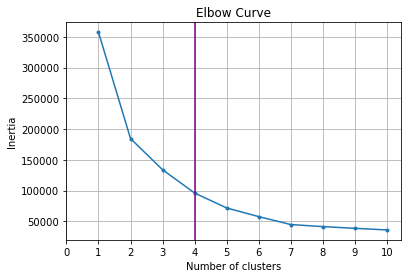

In [51]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data1 = {"k": k, "inertia": inertia}
df_elbow1 = pd.DataFrame(elbow_data1)

plt.plot(df_elbow1['k'], df_elbow1['inertia'], marker ='.')
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.axvline(x = 4, color = 'purple')
plt.show()

In [42]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=7, random_state=0)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Add the predicted class column to the dataframe
pca_df["class"] = model.labels_
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,class
0,-3.134921,-1.091504,-0.574869,-0.638490,-0.038129,-0.667748,0.780932,0.485926,0.219398,-0.058239,...,-0.049678,-0.114303,-0.029055,0.017737,0.087372,-0.051396,-0.024085,0.216714,0.182356,4
1,0.280089,-0.210376,-0.977932,-0.467347,-0.479158,0.554849,0.197305,0.321867,0.197390,0.118480,...,-0.181393,-0.203897,0.006204,-0.034664,-0.024089,-0.067394,-0.029990,0.028899,0.078891,2
2,0.500679,0.015793,-0.710245,-0.016667,0.681156,0.760978,0.595985,-0.560236,-0.328260,-0.086605,...,-0.160840,0.455520,-0.258783,-0.765963,-0.110285,-0.244348,-0.066360,-0.251006,0.088795,2
3,0.052037,-1.457147,-0.679778,-1.242521,-0.090564,0.522287,0.274257,0.674581,-0.244581,0.095814,...,0.491920,0.648182,-0.240601,-0.673748,0.149948,0.188688,-0.328625,-0.370689,-0.080413,2
4,-0.526027,-0.266729,0.477870,0.530229,0.068028,-0.419845,-0.028523,-0.690050,0.315342,0.727789,...,0.092167,0.443633,-0.457707,0.617032,-0.303215,-0.027289,-0.137957,0.103053,-0.054429,1


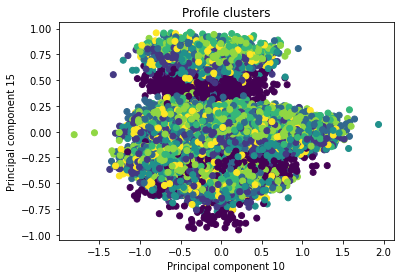

In [43]:
# Visualize the clusters
plt.scatter(x=pca_df[10], y=pca_df[40], c=pca_df['class'])
plt.xlabel('Principal component 10')
plt.ylabel('Principal component 15')
plt.title('Profile clusters')
plt.show()

In [44]:
# Saving cleaned data
file_path = Path("clustered.csv")
clustered_df.to_csv(file_path, index=False)

In [45]:
# Saving cleaned data
file_path = Path("PCA_reduced.csv")
pca_df.to_csv(file_path, index=False)

In [64]:
# Saving cleaned data
file_path = Path("class.csv")
class_df1.to_csv(file_path, index=False)